# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Thoreenz Soldevilla\
_Student No._: 2021-04225\
_Section_: THU-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: November 28, 2023, 6:06 AM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Thoreenz Soldevilla

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

The problem given to us is a multivariable ODE. In order for this problem to be easily solved, we define $(x,y)$ as one variable, say a vector $\textbf{r}$.

We use the fourth-order Runge-Kutta method to approximate the solution to the ODE. We update the value of $x$ and $y$ by determining four k-points and use these points to update the value of $x(t+h)$. These are defined as:
$$\textbf{k}_{1}=h\textbf{f}(\textbf{r},t)$$
$$\textbf{k}_{2}=h\textbf{f}(\textbf{r}+\frac{1}{2}\textbf{k}_1,t+\frac{1}{2}h)$$
$$\textbf{k}_{3}=h\textbf{f}(\textbf{r}+\frac{1}{2}\textbf{k}_2,t+\frac{1}{2}h)$$
$$\textbf{k}_{4}=h\textbf{f}(\textbf{r}+\textbf{k}_3,t+h)$$
Our $\textbf{r}$ at starting $t$ after an interval $h$ is now defined as:
$$\textbf{r}(t+h)=\textbf{r}(t)+\frac{1}{6}(\textbf{k}_{1}+2\textbf{k}_{2}+2\textbf{k}_{3}+\textbf{k}_{4})$$

We first define the Lotka-Volterra equation as a function $\textbf{f}(\textbf{r},t)$ that takes an initial value of an array $\tt [x,y]$ and the initial value $t$.

In [2]:
def f1_1(r, t):
    alpha = 1.0 
    beta = 0.5
    gamma = 0.5
    delta = 2
    x = r[0]
    y = r[1]
    fx = alpha*x - beta*x*y
    fy = gamma*x*y - delta*y
    return np.array([fx, fy], float)

We then define the fourth-order Runge-Kutta method that takes the following arguments:\
$\tt f$, that takes the name of the ODE function,\
$\tt a$, that takes the lower boundary condition of $t$,\
$\tt b$, that takes the upper boundary condition of $t$,\
$\tt xinit$, that takes the initial value of $x$,\
$\tt yinit$, that takes the initial value of $y$, and\
$\tt N$, that takes the number of data points to be sampled.

In [3]:
def ode(f, a, b, x_init, y_init, N):
    h = (b-a)/N # interval between data points

    tpoints = np.arange(a,b,h) # defines the data points 
    xpoints = [] # array for all x values in terms of t
    ypoints = [] # array for all y values in terms of t

    r = np.array([x_init,y_init], float)
    for t in tpoints:
        xpoints.append(r[0]) 
        ypoints.append(r[1])
        # k-points described in the Runge-Kutta method.
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        # updated values of r
        r += (k1+2*k2+2*k3+k4)/6
    return np.array([tpoints, xpoints, ypoints])

We try this method by using the following arguments:\
$\tt f$ = f1_1\
$\tt a = 0$, time start\
$\tt b = 30$, time end\
$\tt xinit = 2$ rabbits\
$\tt yinit = 2$ foxes\
$\tt N = 1000$, number of data points.

In [4]:
f1_data = ode(f1_1, 0., 30., 2., 2., 1000)
f1_data

array([[ 0.        ,  0.03      ,  0.06      , ..., 29.91      ,
        29.94      , 29.97      ],
       [ 2.        ,  2.0008912 ,  2.00353116, ...,  5.13930689,
         5.23226597,  5.32570657],
       [ 2.        ,  1.94089974,  1.88359589, ...,  0.79787411,
         0.81219214,  0.82792388]])

We see that we get an array containing three sub-arrays containing time, number of rabbits, and number of foxes. Let us graph the number of foxes and rabbits, separately, with respect to time.

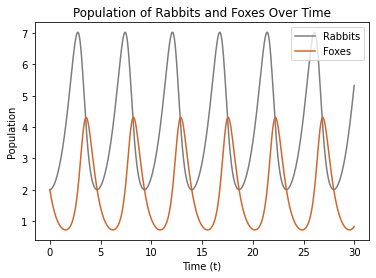

In [5]:
plt.plot(f1_data[0], f1_data[1], color='#7d7d7d', label='Rabbits') # Graph of Rabbits
plt.plot(f1_data[0], f1_data[2], color='#d1662c', label='Foxes') # Graph of Foxes
plt.xlabel('Time (t)')
plt.ylabel('Population')
plt.title('Population of Rabbits and Foxes Over Time')
plt.legend()
plt.show()

Looking at the graph, we see that the rabbits and foxes start at the same population of 2000. We then see that the number of foxes start to decline while the number of rabbits rapidly increase. The coefficient $\alpha = 1.0 $ represents the birthrate of the prey (rabbits) and $\delta = 2.0 $ as the deathrate of the predators (foxes). We see here that the death rate of the foxes are greater than the birth rate of rabbits, hence the decline of the fox population.

Between the initial rabbit population and its peak, the number of foxes start to increase, to which the rabbits experience a peak population of around 7000. After such number the number of foxes increased until it peaked during the middle of the decline of the number of rabbits. We can infer that the population of the rabbits is logistically increasing until there are enough foxes that could hunt them to cause the decline. We say middle because $\beta = \gamma = 0.50$ which is the rate of the prey being caught. Note that beta and gamma are simply proportional with each other [1]; they are not necessarily the same. It so happens that in this example, they are of equal value.

From such peak, the fox population starts to decrease. This could the the carrying capacity [2] of the population at which there is not enough rabbits for the foxes to feed into, so many of them die or have to migrate somewhere where there is an abundance of rabbits. At the middle of the downward trend, the rabbit population start to increase again. The natural predators of the rabbits are small enough to disturb the latter's breeding cycle. This pattern repeats all over again.

Finally, let us graph the population of rabbits vs. the population of foxes.

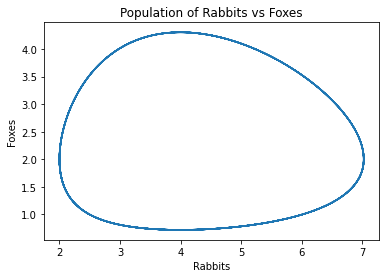

In [6]:
plt.plot(f1_data[1], f1_data[2])
plt.title('Population of Rabbits vs Foxes')
plt.xlabel('Rabbits')
plt.ylabel('Foxes')
plt.show()

We see that the graph is cyclical - the number of rabbits increase when the number of foxes decrease, and the number of foxes increase when the number of rabbits decrease. The oval is flat, favoring the number of rabbits. This is consistent with the death rate of foxes being higher than the birth rate of the rabbits.

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


We first define the function f2 in accordance with equations 8.45 and 8.46. Equation 8.45 means that the change in angular displacement over change in time is equal to the angular velocity of the system, described as:
$$\frac{d\theta}{dt}=\omega$$
Whereas the change in angular velocity over change in time is described as:
$$\frac{d\omega}{dt}=-\frac{g}{l}\sin{\theta}$$.
We define this system of differential equations using the function $\tt f2$ that takes the values of $\tt r = [x,y]$ and $\tt t$.

In [7]:
def f2(r, t):
    theta = r[0] 
    omega = r[1]
    g = 9.81 # Acceleration due to gravity
    l = 10 # Length of the pendulum
    f_theta = omega # Eq. 8.45
    f_omega = -(g/l)*(sin(theta)) # Eq. 8.46
    return np.array([f_theta, f_omega], float)

After we have created the function, we then employ the function $\tt ode$ that uses the fourth-order Runge-Kutta method similar to example 1. We use the following arguments:\
$\tt f$ = f2\
$\tt a = 0s $, time start\
$\tt b = 100s$, time end\
$\tt xinit = 179^{\circ}$ initial angular displacement\
$\tt yinit = 0$ initial angular velocity\
$\tt N = 1000$, number of data points.

In [71]:
f2_data = ode(f2, 0., 100., np.deg2rad(179.), 0., 1000)
f2_data

array([[ 0.00000000e+00,  1.00000000e-01,  2.00000000e-01, ...,
         9.97000000e+01,  9.98000000e+01,  9.99000000e+01],
       [ 3.12413936e+00,  3.12405369e+00,  3.12379582e+00, ...,
         3.11745884e+00,  3.11571529e+00,  3.11371769e+00],
       [ 0.00000000e+00, -1.71487990e-03, -3.44659391e-03, ...,
        -1.62244368e-02, -1.86752247e-02, -2.13093042e-02]])

We now have an array with sub-arrays of time, angular displacement, and angular velocity. Let us plot the angular displacement over time.

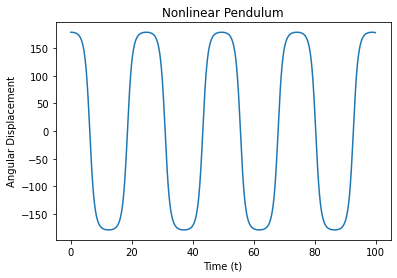

In [78]:
plt.plot(f2_data[0], np.rad2deg(f2_data[1]))
plt.xlabel('Time (t)')
plt.ylabel('Angular Displacement')
plt.title('Nonlinear Pendulum')
plt.show()

We see that the motion is periodic, but does not resemble a simple sinusoidal graph. Let us compare it with other initial angular displacements, by using values of $\tt\theta={60, 90, 120, 150}$.

In [59]:
f2_data_2 = ode(f2, 0., 100., np.deg2rad(150.), 0., 1000)
f2_data_3 = ode(f2, 0., 100., np.deg2rad(120.), 0., 1000)
f2_data_4 = ode(f2, 0., 100., np.deg2rad(90.), 0., 1000)
f2_data_5 = ode(f2, 0., 100., np.deg2rad(60.), 0., 1000)

Let us plot the graph of each starting angular displacements.

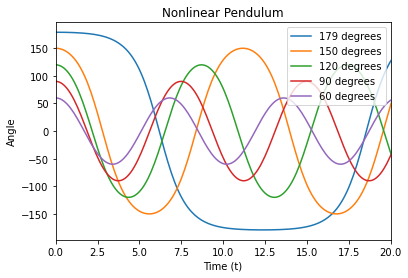

In [76]:
plt.plot(f2_data[0], np.rad2deg(f2_data[1]), label = '179 degrees')
plt.plot(f2_data_2[0], np.rad2deg(f2_data_2[1]), label = '150 degrees')
plt.plot(f2_data_3[0], np.rad2deg(f2_data_3[1]), label = '120 degrees')
plt.plot(f2_data_4[0], np.rad2deg(f2_data_4[1]), label = '90 degrees')
plt.plot(f2_data_5[0], np.rad2deg(f2_data_5[1]), label = '60 degrees')
plt.xlabel('Time (t)')
plt.ylabel('Angle')
plt.title('Nonlinear Pendulum')
plt.xlim(0,20)
plt.legend()
plt.show()

We see that as we increase the initial displacement, the period it takes for a pendulum to go back to its original position is longer. We then check its angular velocity.

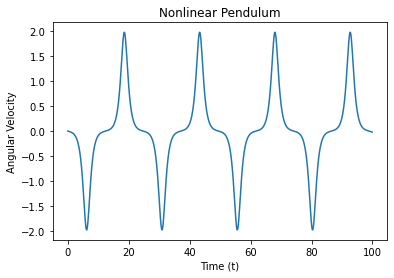

In [72]:
plt.plot(f2_data[0], f2_data[2])
plt.xlabel('Time (t)')
plt.ylabel('Angular Velocity')
plt.title('Nonlinear Pendulum')
plt.show()

We see here that the angular velocity is also periodic, but has some inflection point as it approaches zero, or when the pendulum is about to return to its initial displacement. Let us then compare this with other initial displacements.

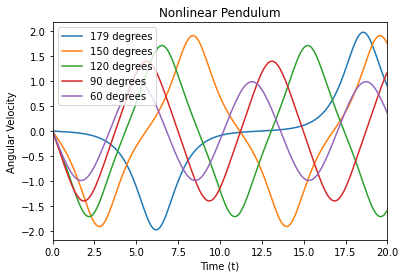

In [75]:
plt.plot(f2_data[0], f2_data[2], label = '179 degrees')
plt.plot(f2_data_2[0], f2_data_2[2], label = '150 degrees')
plt.plot(f2_data_3[0], f2_data_3[2], label = '120 degrees')
plt.plot(f2_data_4[0], f2_data_4[2], label = '90 degrees')
plt.plot(f2_data_5[0], f2_data_5[2], label = '60 degrees')
plt.xlabel('Time (t)')
plt.ylabel('Angular Velocity')
plt.title('Nonlinear Pendulum')
plt.xlim(0,20)
plt.legend()
plt.show()

We see here that the smaller angles resemble a simple harmonic motion. However, as we increase the initial displacement, the maximum angular velocity increases, and the inflection point becomes more pronounced. We can see that at smaller $\theta$, the pendulum follows simple harmonic motion. Increasing the $\theta$ means that when the pendulum returns to its original position, the effect of acceleration due to gravity is more prevalent. Hence within a full half-period, $\omega$ increases logistically.

Finally, let us graph the data with the angular displacement $\theta$ vs angular velocity $\omega$, and compare it with different angular displacements, creating a phase portrait in the process.

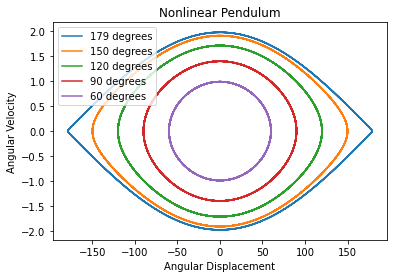

In [77]:
plt.plot(np.rad2deg(f2_data[1]), f2_data[2], label='179 degrees')
plt.plot(np.rad2deg(f2_data_2[1]), f2_data_2[2], label='150 degrees')
plt.plot(np.rad2deg(f2_data_3[1]), f2_data_3[2], label='120 degrees')
plt.plot(np.rad2deg(f2_data_4[1]), f2_data_4[2], label='90 degrees')
plt.plot(np.rad2deg(f2_data_5[1]), f2_data_5[2], label='60 degrees')
plt.xlabel('Angular Displacement')
plt.ylabel('Angular Velocity')
plt.title('Nonlinear Pendulum')
plt.legend()
plt.show()

We can see that smaller $\theta$ results in a cyclical relationship, hence it follows SHM. For larger $\theta$ the phase diagram continues to bend at the initial $\theta$ and its opposite. This is consistent with the graphs provided by $\theta/t$ and $\omega/t$. 

We can infer that the pendulum is linear at smaller $\theta$ since it follows a simple harmonic motion. At larger $\theta$, however, gravity takes effect to make the logistical trend for $\omega$.

**References:**

[1] Libretexts. 1.4: The Lotka-Volterra Predator-Prey Model. https://math.libretexts.org/Bookshelves/Applied_Mathematics/Mathematical_Biology_(Chasnov)/01%3A_Population_Dynamics/1.04%3A_The_Lotka-Volterra_Predator-Prey_Model \
[2] Bierema, A. An Interactive Introduction to Organismal and Molecular Biology, 2nd ed. \
https://openbooks.lib.msu.edu/isb202/chapter/population-growth/#:~:text=There%20are%20two%20main%20models,exponential%20growth%20and%20logistic%20growth.